In [1]:
#Gerekli Kütüphaneler
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import models, layers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

# Verimiz Import Edelim Ve Tanıyalım

In [3]:
df = pd.read_csv('breast-cancer.csv')
df.head(5) #verinin ilk 5 satirini gorelim

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
#Sutunlar Hakkinda bilgi alalim
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#verimiz 569 satir 32 sutundan olusmakta
df.shape

(569, 32)

In [7]:
#total verimizde herhangi bir eksik varmi onu kontrol ediyoruz var ise
#eksik veri hangi sutunda ise o verilerin medyani eksik kisma girilebilir
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [41]:
df.mean()

id                         3.037183e+07
radius_mean                1.412729e+01
texture_mean               1.928965e+01
perimeter_mean             9.196903e+01
area_mean                  6.548891e+02
smoothness_mean            9.636028e-02
compactness_mean           1.043410e-01
concavity_mean             8.879932e-02
concave points_mean        4.891915e-02
symmetry_mean              1.811619e-01
fractal_dimension_mean     6.279761e-02
radius_se                  4.051721e-01
texture_se                 1.216853e+00
perimeter_se               2.866059e+00
area_se                    4.033708e+01
smoothness_se              7.040979e-03
compactness_se             2.547814e-02
concavity_se               3.189372e-02
concave points_se          1.179614e-02
symmetry_se                2.054230e-02
fractal_dimension_se       3.794904e-03
radius_worst               1.626919e+01
texture_worst              2.567722e+01
perimeter_worst            1.072612e+02
area_worst                 8.805831e+02


In [8]:
#verimiz hangi sutunlardan olusmus onlari gorelim
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
#sutunlarin veri tipleri
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
#Verinin temel istatistiksel özellikleri
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Verimizi Daha iyi anlamak icin Gorsellestirelim

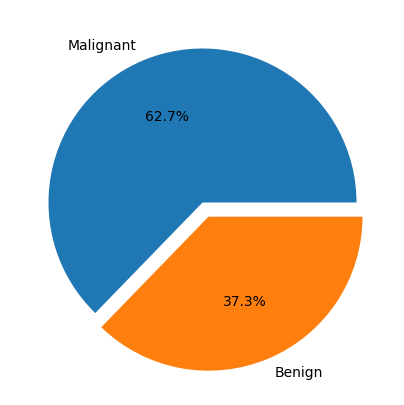

In [11]:
plt.figure(figsize = (5,5))

labels = ["Malignant","Benign"]
explode = [0, 0.1]

plt.pie(df.diagnosis.value_counts(), labels = labels, explode = explode, autopct = '%1.1f%%')

plt.show()

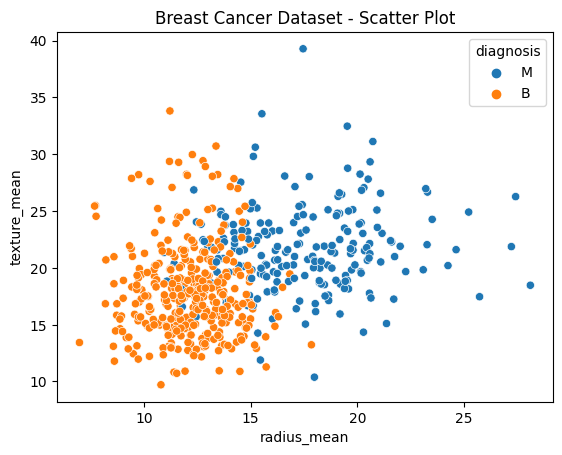

In [12]:
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df)
plt.title('Breast Cancer Dataset - Scatter Plot')
plt.show()

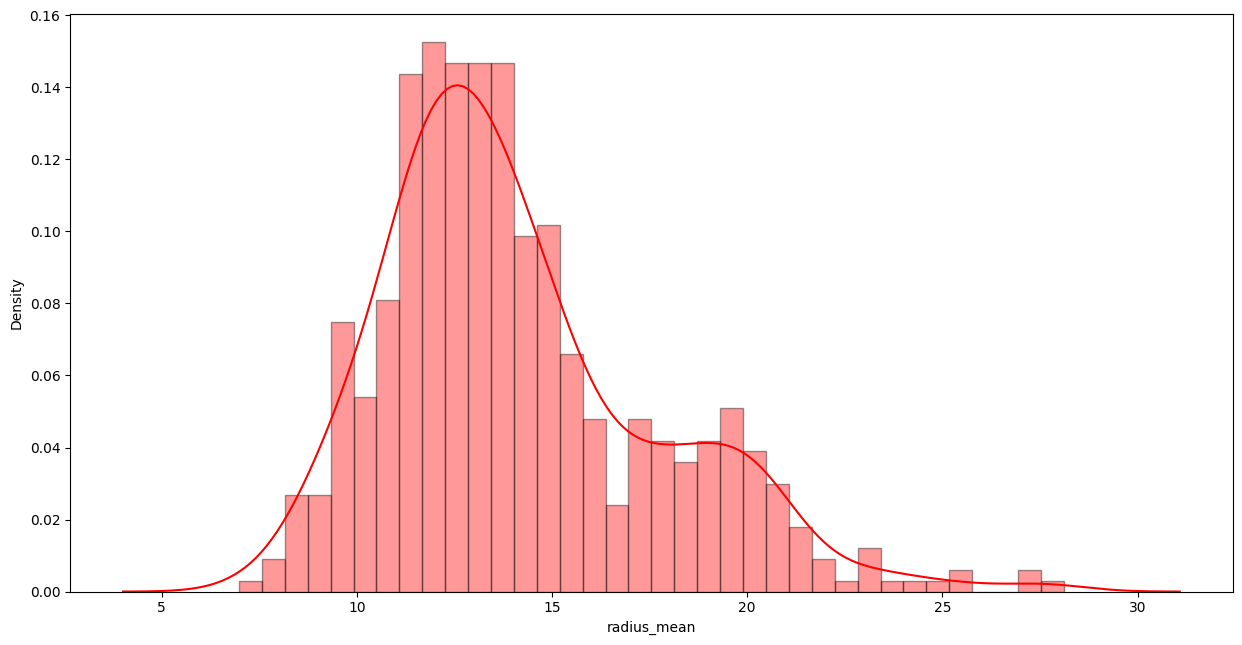

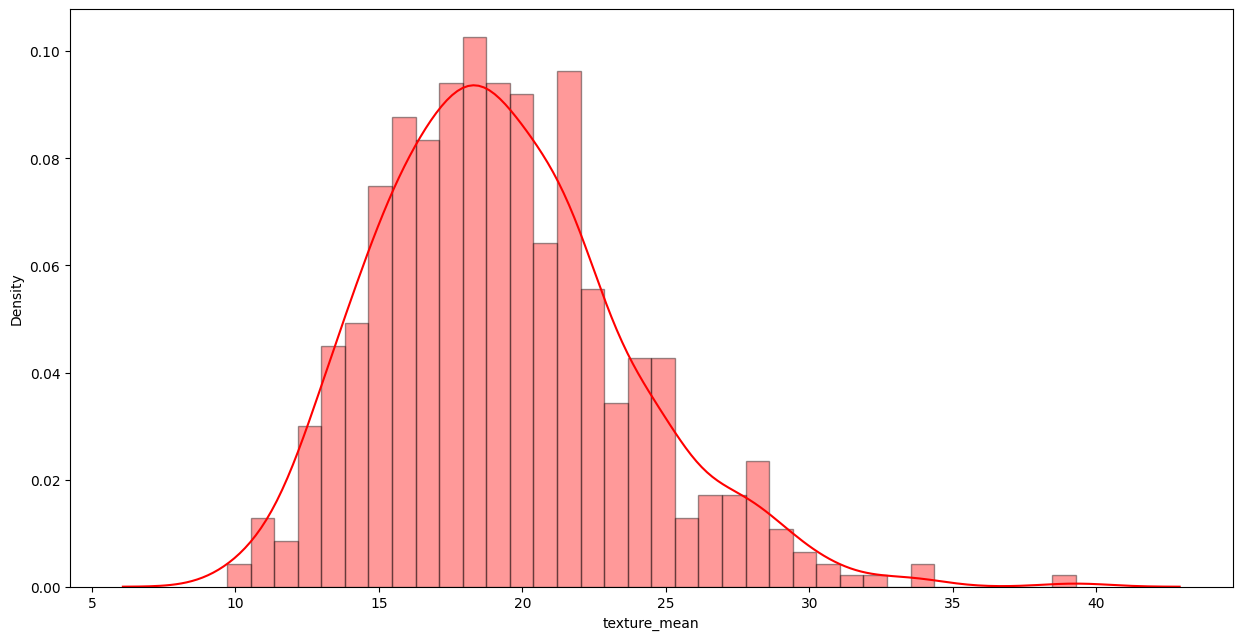

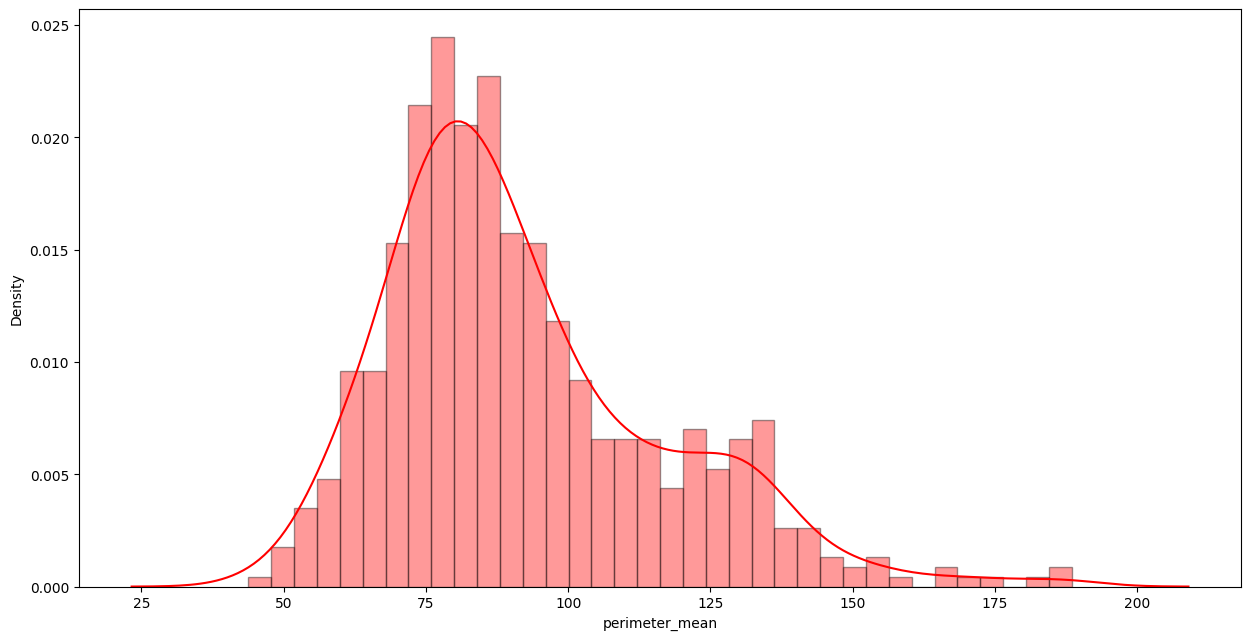

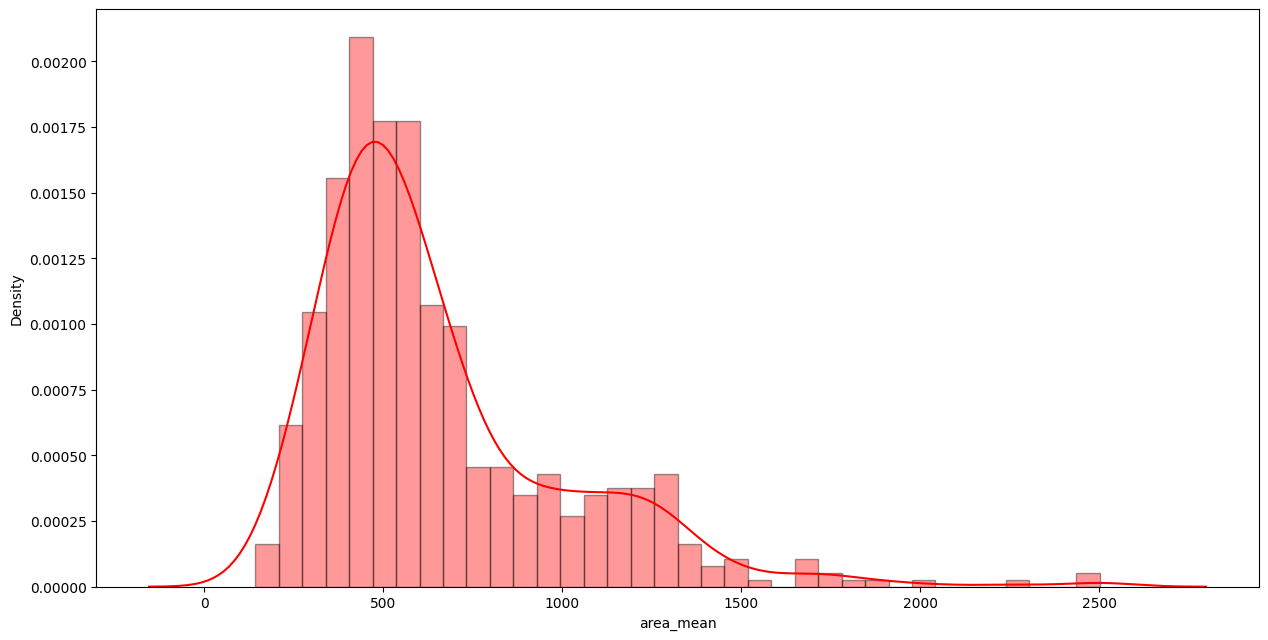

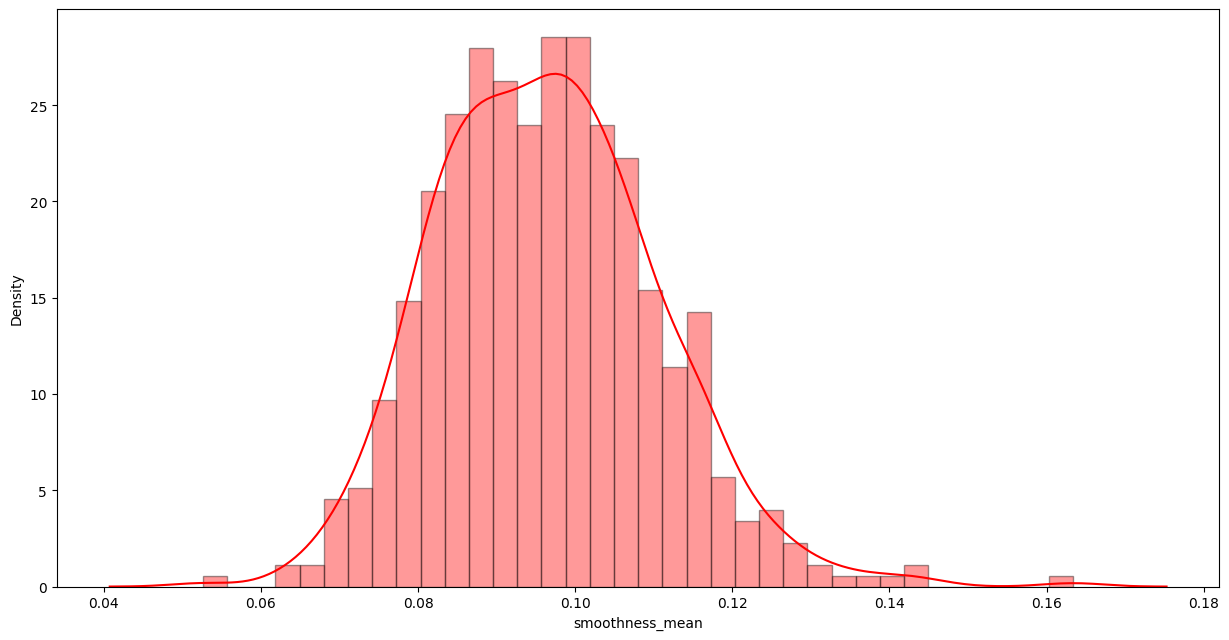

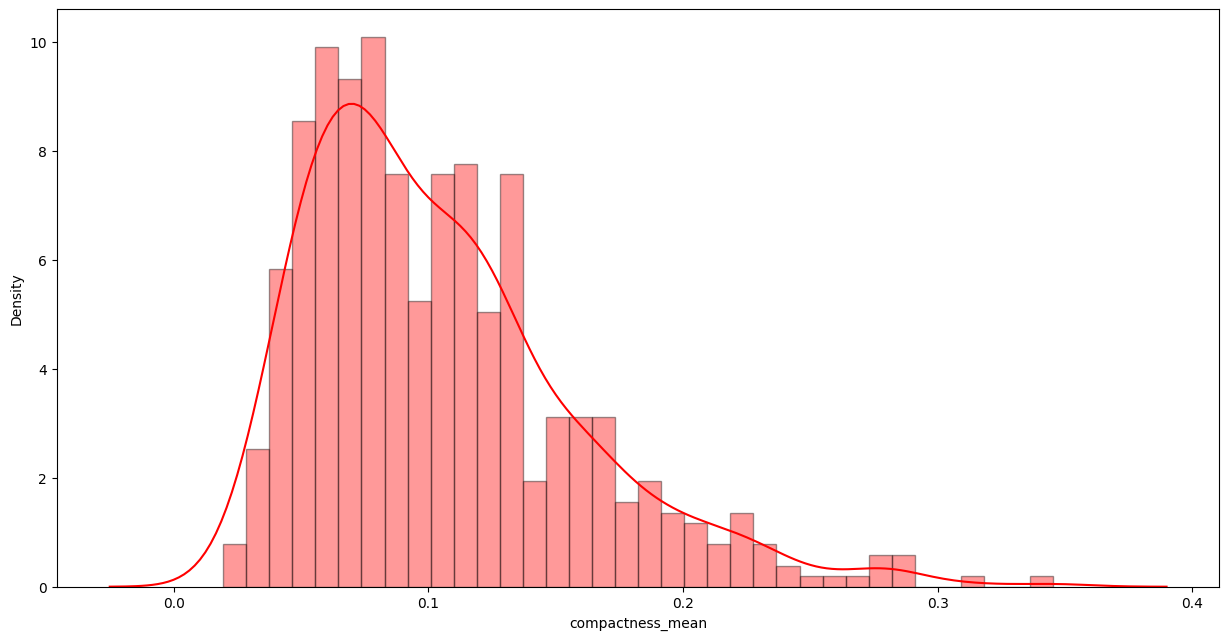

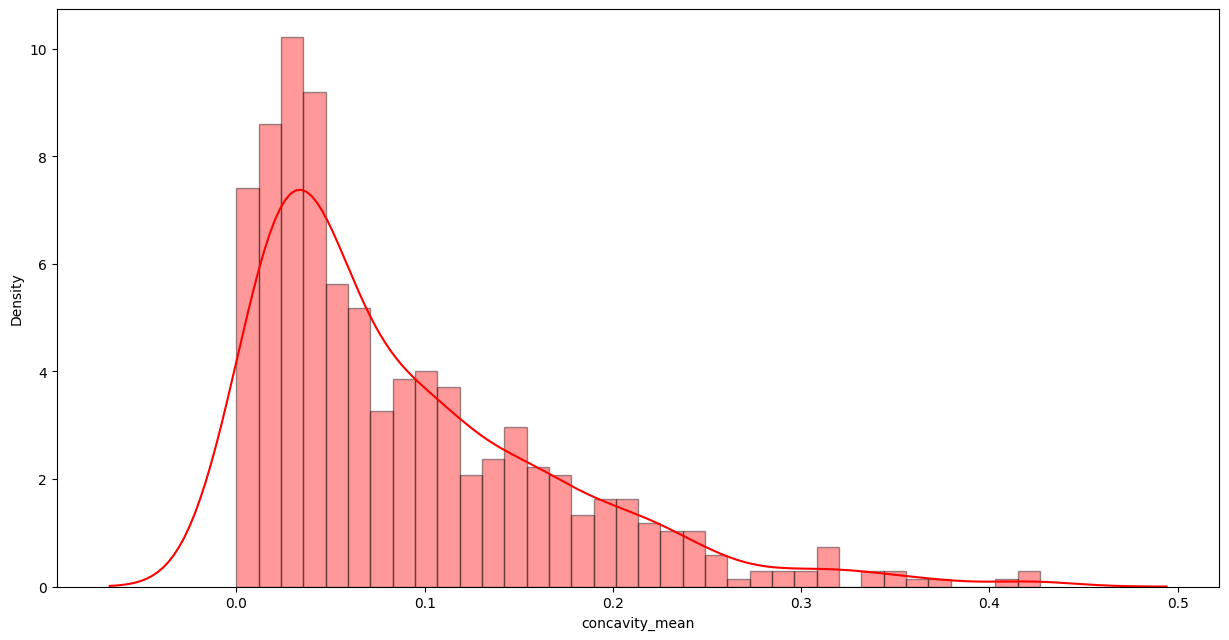

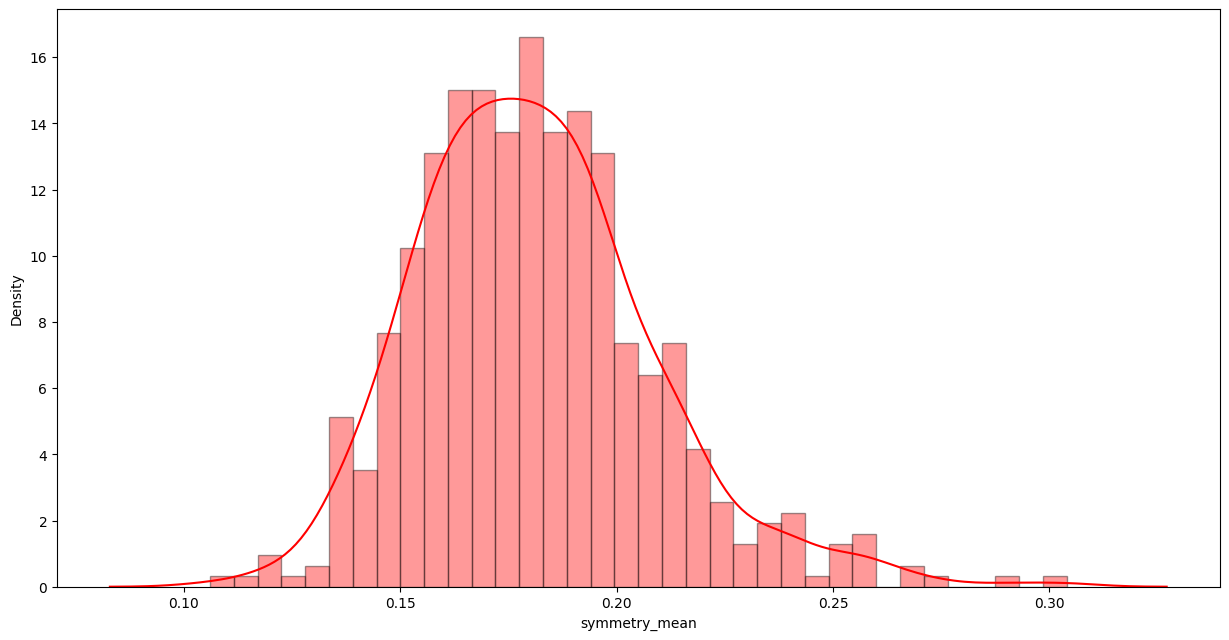

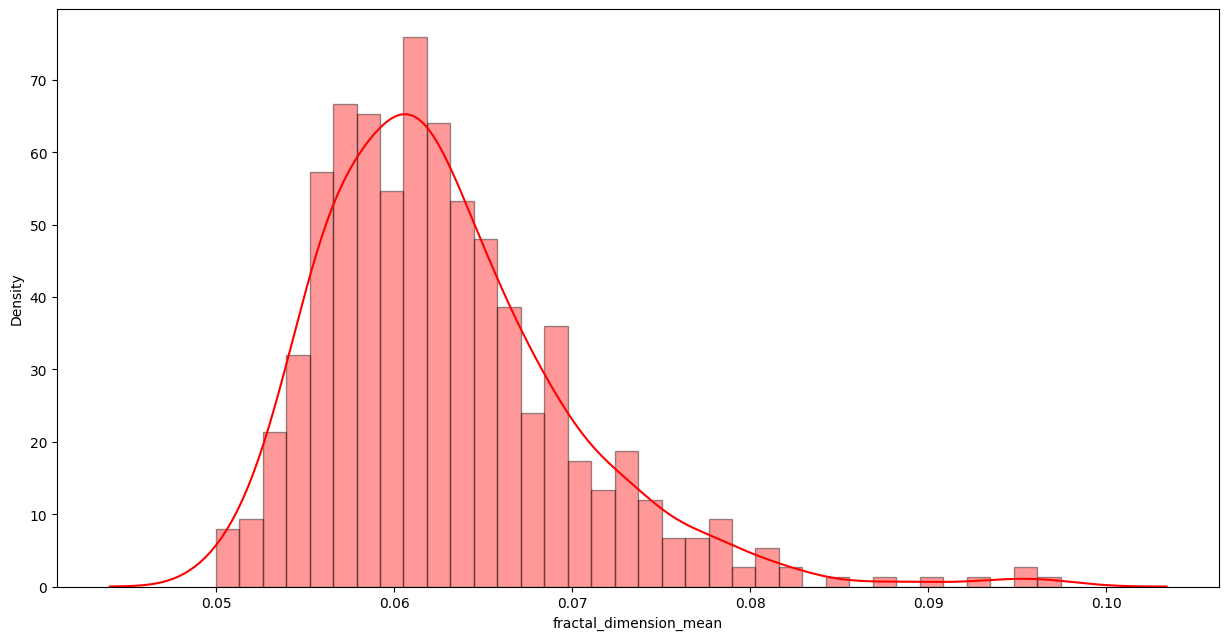

In [13]:
mean_features = ["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","symmetry_mean","fractal_dimension_mean"]

for i in mean_features:
    plt.figure(figsize = (15,7.5))
    sns.distplot(df[i], hist=True, kde=True,
                    bins=int(180/5), color = 'red',
                     hist_kws={'edgecolor':'black'})

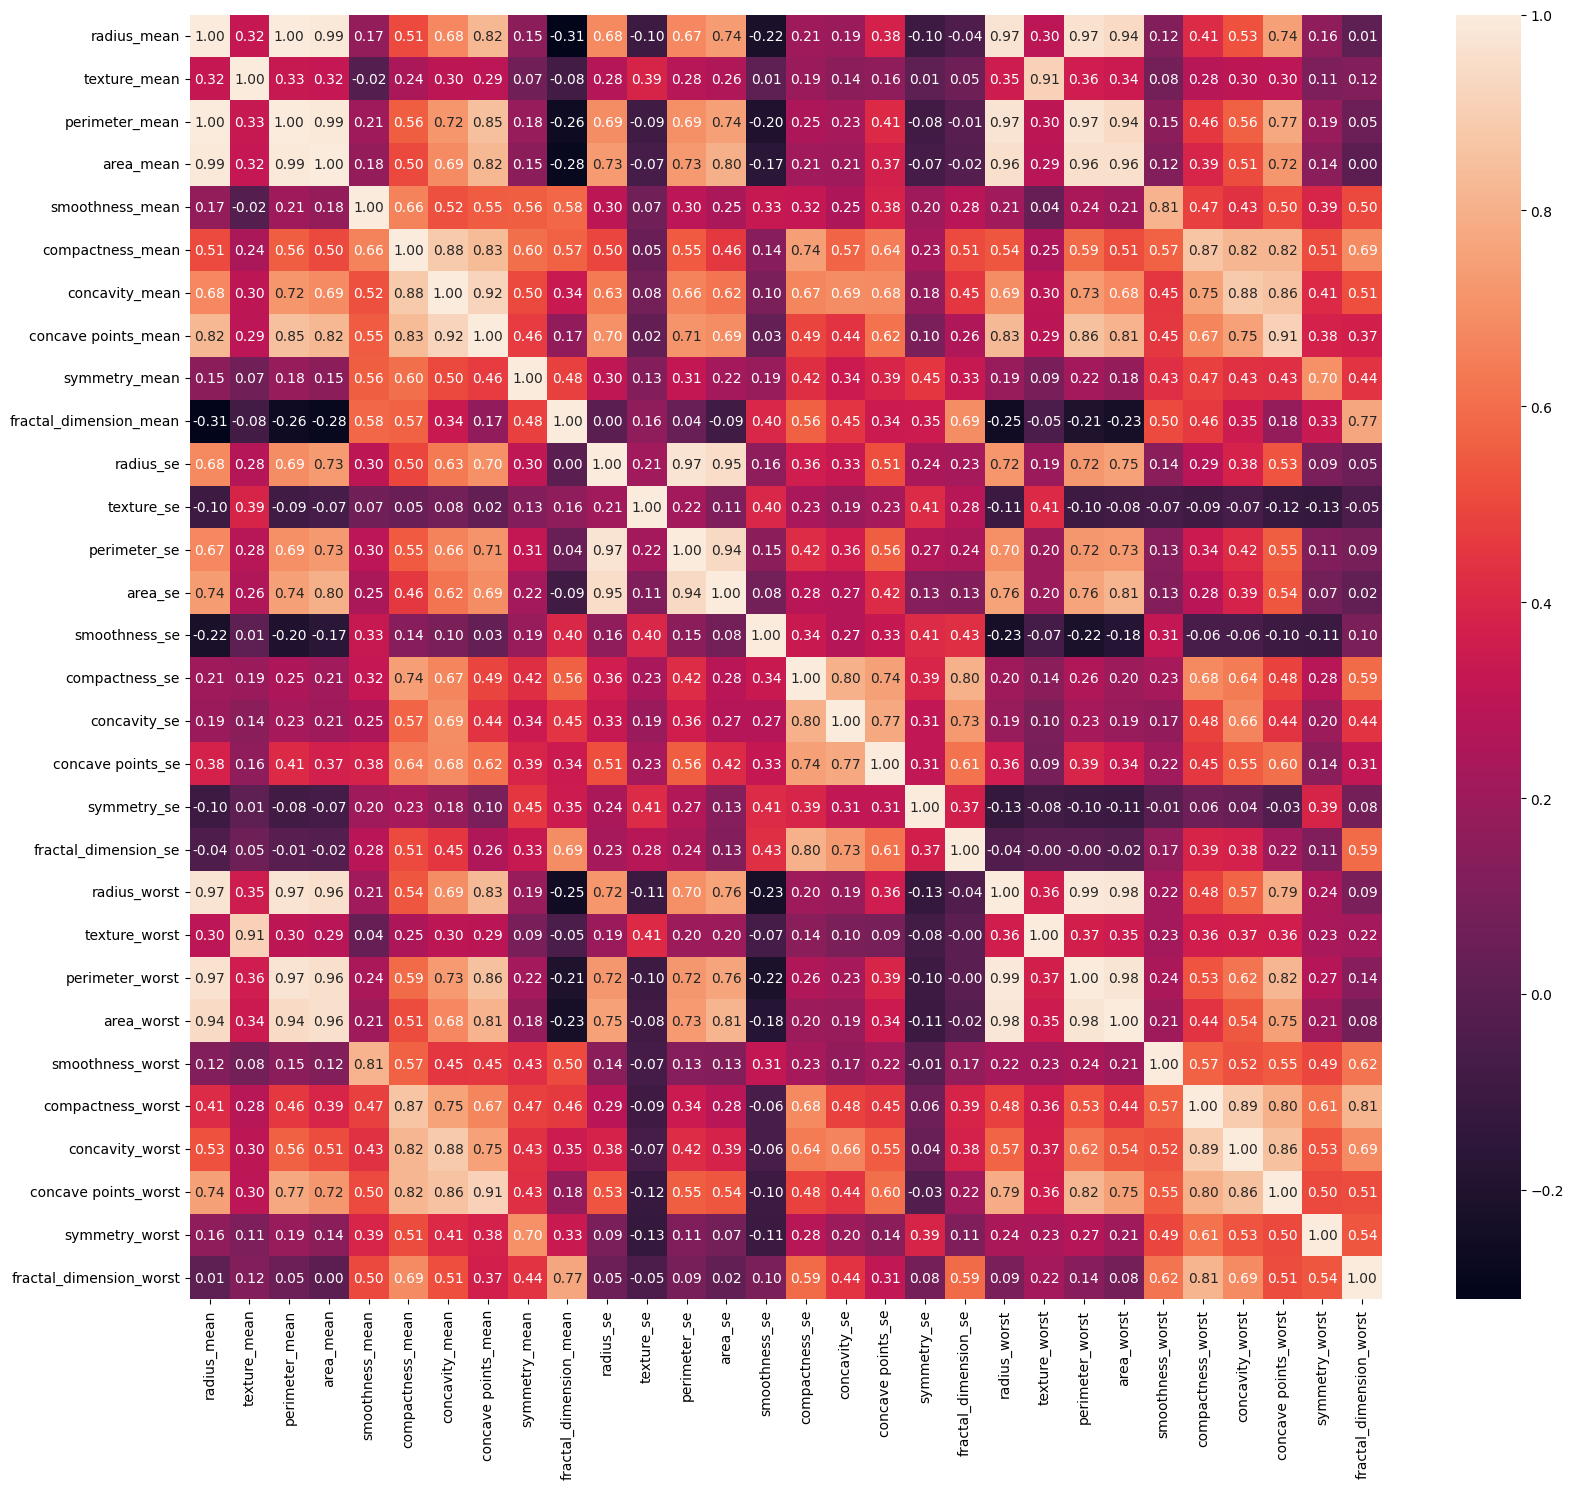

In [14]:
plt.figure(figsize = (17, 15))

param_list = df.columns
sns.heatmap(df[param_list[1:]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

# Algoritmaya verecegimiz verilerimizi hazirlayalim

In [15]:
#burada iki adet degisken olusturacagiz x ve y olmak uzere
# y hangi veriyi tahmin etmek istedigimiz
# x ise bizim algoritmaya verecegim veri kumesi olucak

y = df[["diagnosis"]]
X = df.drop(columns=['diagnosis','id'],axis=1)

**DecisionTree Classifer Modelimizi Olusturalim**

In [16]:
#Modelimizi Olusturalim

dc_x_train,dc_x_test,dc_y_train,dc_y_test = train_test_split(X,y,train_size=0.8,random_state=34)

tree = DecisionTreeClassifier()
model= tree.fit(dc_x_train,dc_y_train)


In [17]:
dc_model_score=model.score(dc_x_test,dc_y_test)

print("Model Skoru:",dc_model_score)

Model Skoru: 0.9649122807017544


**CNN Modelimizi Olusturalim**

In [18]:
label_encoder = LabelEncoder()
cnn_y = label_encoder.fit_transform(y)

In [19]:
# Eğitim ve test setlerine ayırma
cnn_X_train, cnn_X_test, cnn_y_train, cnn_y_test = train_test_split(X, cnn_y, test_size=0.2, random_state=42)

In [20]:
# Veriyi standardize etme (ölçeklendirme)
scaler = StandardScaler()
cnn_X_train = scaler.fit_transform(cnn_X_train)
cnn_X_test = scaler.transform(cnn_X_test)

In [21]:
# Modeli oluşturma
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(cnn_X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
# Modeli derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Modeli eğitme
model.fit(cnn_X_train, cnn_y_train, epochs=10, batch_size=32, validation_split=0.2)

# Modeli değerlendirme
test_loss, cnn_test_acc = model.evaluate(cnn_X_test, cnn_y_test)
print(f'Test Accuracy: {cnn_test_acc}')

Epoch 1/10
12/12 [==============================] - 1s 29ms/step - loss: 0.4092 - accuracy: 0.8846 - val_loss: 0.2990 - val_accuracy: 0.9011
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 0.2603 - accuracy: 0.9368 - val_loss: 0.2149 - val_accuracy: 0.9231
Epoch 3/10
12/12 [==============================] - 0s 6ms/step - loss: 0.1814 - accuracy: 0.9478 - val_loss: 0.1708 - val_accuracy: 0.9451
Epoch 4/10
12/12 [==============================] - 0s 7ms/step - loss: 0.1369 - accuracy: 0.9533 - val_loss: 0.1445 - val_accuracy: 0.9560
Epoch 5/10
12/12 [==============================] - 0s 7ms/step - loss: 0.1088 - accuracy: 0.9753 - val_loss: 0.1292 - val_accuracy: 0.9560
Epoch 6/10
12/12 [==============================] - 0s 7ms/step - loss: 0.0916 - accuracy: 0.9835 - val_loss: 0.1195 - val_accuracy: 0.9560
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0787 - accuracy: 0.9835 - val_loss: 0.1130 - val_accuracy: 0.9670
Epoch 8/10
12/12 [=

**KNN Modelimizi Olusturalim**

In [24]:
# Veriyi eğitim ve test setlerine ayırma
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Veriyi standardize etme (ölçeklendirme)
knn_scaler = StandardScaler()
knn_X_train = scaler.fit_transform(knn_X_train)
knn_X_test = scaler.transform(knn_X_test)

In [26]:
# KNN modelini oluşturma ve eğitme
knn_model = KNeighborsClassifier(n_neighbors=3)  # n_neighbors parametresi, komşu sayısını belirler
knn_model.fit(knn_X_train, knn_y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
# Test verisi üzerinde tahmin yapma
knn_y_pred = knn_model.predict(knn_X_test)

In [28]:
# Modelin başarısını değerlendirme
knn_accuracy = accuracy_score(knn_y_test, knn_y_pred)
print(f'Test Accuracy: {knn_accuracy}')

Test Accuracy: 0.9473684210526315


**ANN Modelimizi Olusturalim**

In [29]:
# Meme kanseri veri setini yükle
from sklearn.datasets import load_breast_cancer
veri = load_breast_cancer()
ann_X = pd.DataFrame(veri.data, columns=veri.feature_names)
ann_y = pd.Series(veri.target, name='target')

# Veriyi eğitim ve test setlerine ayır
X_egitim, X_test, y_egitim, y_test = train_test_split(ann_X, ann_y, test_size=0.2, random_state=42)

# Veriyi standartlaştır
olcekleyici = StandardScaler()
X_egitim_olcekli = olcekleyici.fit_transform(X_egitim)
X_test_olcekli = olcekleyici.transform(X_test)

# Yapay Sinir Ağı modelini oluştur
ann_modeli = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Modeli eğit
ann_modeli.fit(X_egitim_olcekli, y_egitim)

# Test seti üzerinde tahmin yap
y_pred = ann_modeli.predict(X_test_olcekli)

# Model performansını değerlendir
ann_dogruluk = accuracy_score(y_test, y_pred)
print(f'Doğruluk: {ann_dogruluk:.2f}')

# Sınıflandırma raporunu göster
print('\nSınıflandırma Raporu:\n', classification_report(y_test, y_pred))

# Karışıklık matrisini göster
print('\nKarışıklık Matrisi:\n', confusion_matrix(y_test, y_pred))

Doğruluk: 0.97

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Karışıklık Matrisi:
 [[41  2]
 [ 1 70]]


In [34]:
print(ann_dogruluk)
print(knn_accuracy)
print(cnn_test_acc)
print(dc_model_score)



0.9736842105263158
0.9473684210526315
0.9649122953414917
0.9649122807017544


In [31]:



data = {
    'Algorithm': ['ANN', 'KNN', 'CNN', 'Decision Tree'],
    'Accuracy': [ann_dogruluk, knn_accuracy, cnn_test_acc, dc_model_score]
}

df3 = pd.DataFrame(data)

# Değişken isimlerini güzel bir yazı tipiyle yazdırma
for algorithm, accuracy in zip(df3['Algorithm'], df3['Accuracy']):
    print(f'{algorithm} Accuracy: {accuracy:.4f}')


ANN Accuracy: 0.9737
KNN Accuracy: 0.9474
CNN Accuracy: 0.9649
Decision Tree Accuracy: 0.9649


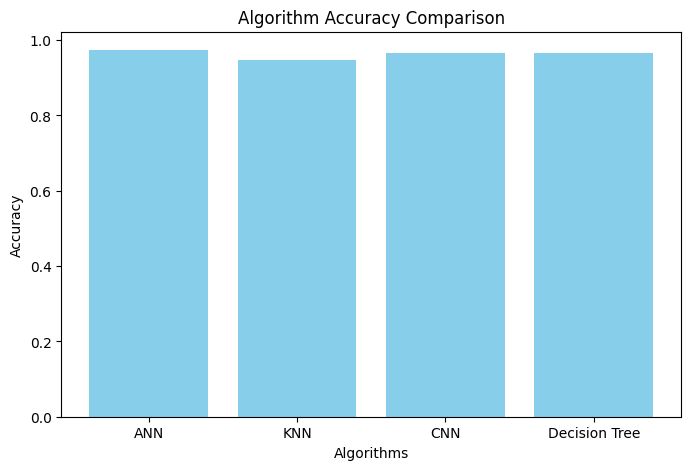

In [35]:
# Örnek veri setini oluşturun
data = {
    'Algorithm': ['ANN', 'KNN', 'CNN', 'Decision Tree'],
    'Accuracy': [ann_dogruluk, knn_accuracy, cnn_test_acc, dc_model_score]
}

df2 = pd.DataFrame(data)

# Çubuk grafik oluşturun
plt.figure(figsize=(8, 5))
plt.bar(df2['Algorithm'], df2['Accuracy'], color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Algorithm Accuracy Comparison')
plt.show()

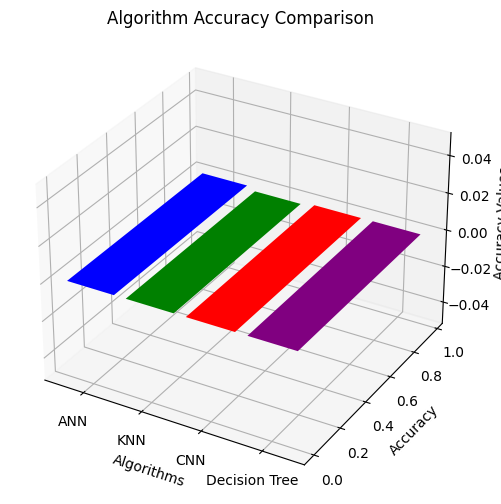

In [36]:
data = {
    'Algorithm': ['ANN', 'KNN', 'CNN', 'Decision Tree'],
    'Accuracy': [ann_dogruluk, knn_accuracy, cnn_test_acc, dc_model_score]
}

df2 = pd.DataFrame(data)

# 3D grafik oluşturun
fig0 = plt.figure(figsize=(10, 6))
ax0 = fig0.add_subplot(111, projection='3d')

# Çubuk grafik çizin
ax0.bar(df2['Algorithm'], df2['Accuracy'], color=['blue', 'green', 'red', 'purple'])

# Eksen etiketlerini ayarlayın
ax0.set_xlabel('Algorithms')
ax0.set_ylabel('Accuracy')
ax0.set_zlabel('Accuracy Values')

# Başlığı ayarlayın
plt.title('Algorithm Accuracy Comparison')

# Grafikleri gösterin
plt.show()

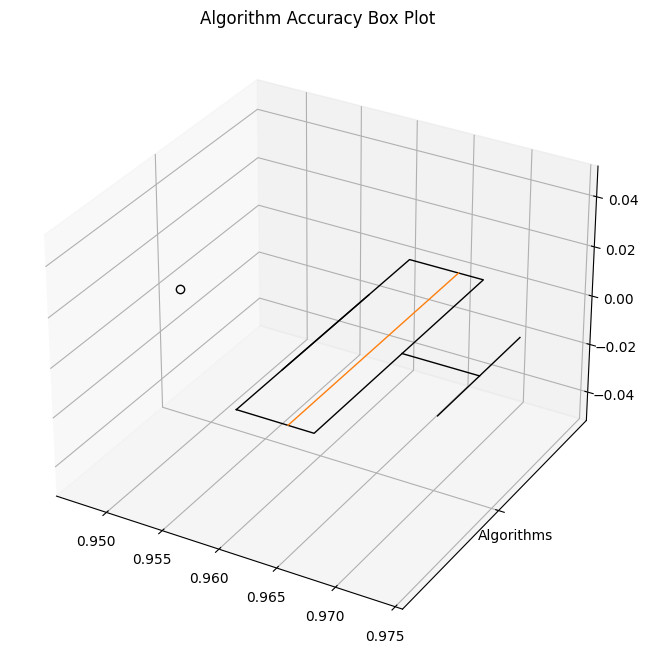

In [37]:
# 3D grafik oluşturun
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Kutu grafiği çizin
ax.boxplot(df2['Accuracy'], vert=False)

# Eksen etiketlerini ayarlayın
ax.set_yticklabels(['Algorithms'])

# Başlığı ayarlayın
plt.title('Algorithm Accuracy Box Plot')

# Grafikleri gösterin
plt.show()